In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
DoD = pd.read_csv("Data_Master_2.csv")
DoD.info()
DoD

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dates                              507 non-null    object 
 1   Date                               507 non-null    int64  
 2   Bitcoin_Volume                     507 non-null    float64
 3   Bitcoin_Price                      507 non-null    float64
 4   Bitcoin_Price_Close                507 non-null    float64
 5   Bitcoin_Price_Previous_Day_Open    507 non-null    float64
 6   Bitcoin_Price_One_Week_Prior_Open  507 non-null    float64
 7   Ethereum_Price                     507 non-null    float64
 8   Doge_Price                         507 non-null    float64
 9   Litecoin_Price                     507 non-null    float64
 10  SP500                              507 non-null    float64
 11  UST_1Y_Maturity                    507 non-null    float64

,Dates,Date,Bitcoin_Volume,Bitcoin_Price,Bitcoin_Price_Close,Bitcoin_Price_Previous_Day_Open,Bitcoin_Price_One_Week_Prior_Open,Ethereum_Price,Doge_Price,Litecoin_Price,...,Negative_Tweet,Neutral_Tweets,Tweet_Average_Sentiment,News_Article_Count,News_Sentiment,Crypto_Global_Ranking,BTC_Price_Movement_DOD_UD,BTC_Price_Movement_DOD_10,BTC_Price_Movement_ID_UD,BTC_Price_Movement_ID_10
0,11-10-2021,1,4.873083e+10,54734.12500,57484.78906,54952.82031,48208.90625,4636.174316,0.255709,261.262970,...,220,933,0.075143,12,0.058515,56.000000,Up,1,Up,1
1,12-10-2021,2,3.096601e+10,57526.83203,56041.05859,54734.12500,49174.96094,3908.496094,0.164422,148.598297,...,162,657,0.077401,9,0.116162,56.000000,Up,1,Down,0
2,13-10-2021,3,4.168425e+10,56038.25781,57401.09766,57526.83203,51486.66406,3606.201660,0.232572,177.628326,...,119,697,0.084999,7,0.092929,56.000000,Up,1,Up,1
3,14-10-2021,4,3.661579e+10,57372.83203,57321.52344,56038.25781,55338.62500,3786.014160,0.232273,180.118393,...,146,745,0.080296,4,0.046465,56.000000,Down,0,Down,0
4,15-10-2021,5,5.178008e+10,57345.90234,61593.94922,57372.83203,53802.14453,3862.634766,0.233782,188.814133,...,392,1748,0.064239,1,0.000000,56.000000,Up,1,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,25-02-2023,503,1.610072e+10,23200.12500,23175.37500,23946.00781,24565.29688,1594.914917,0.080786,93.263451,...,44,210,0.079262,23,0.147738,22.181818,Down,0,Down,0
503,26-02-2023,504,1.664453e+10,23174.15039,23561.21289,23200.12500,24640.02734,1640.817139,0.082202,95.255623,...,57,195,0.061385,18,0.038656,22.000000,Down,0,Up,1
504,27-02-2023,505,2.266076e+10,23561.45117,23522.87109,23174.15039,24336.62305,1634.326416,0.081354,94.086678,...,73,251,0.066812,53,0.085788,22.000000,Up,1,Down,0
505,28-02-2023,506,2.053536e+10,23521.83789,23147.35352,23561.45117,24833.04883,1605.895142,0.080749,93.792778,...,50,233,0.095058,61,0.015882,22.000000,Up,1,Down,0


In [5]:
DoD_train = DoD[DoD['Date'] <= 405]
DoD_test = DoD[DoD['Date'] > 405]

len(DoD_train), len(DoD_test)

(405, 102)

# Model 1

In [6]:
import statsmodels.formula.api as smf

logreg1 = smf.logit(formula = 'BTC_Price_Movement_DOD_10 ~ Bitcoin_Volume + Bitcoin_Price + Bitcoin_Price_Close + Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Doge_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Gold + Copper + Corn + Singapore_Dollar + Euro + All_Twitter_Posts + Positive_Tweets + Negative_Tweet + Neutral_Tweets + Tweet_Average_Sentiment + News_Article_Count + News_Sentiment + Crypto_Global_Ranking + BTC_Price_Movement_ID_10',
                   data = DoD_train).fit()
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.479098
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_DOD_10   No. Observations:                  405
Model:                                 Logit   Df Residuals:                      378
Method:                                  MLE   Df Model:                           26
Date:                       Thu, 27 Apr 2023   Pseudo R-squ.:                  0.3059
Time:                               00:49:10   Log-Likelihood:                -194.03
converged:                              True   LL-Null:                       -279.54
Covariance Type:                   nonrobust   LLR p-value:                 2.722e-23
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## Model 2 deleting Corn, All_Twitter_Posts, Positive_Tweets, Negative_Tweet, Neutral_Tweets

In [7]:
logreg2 = smf.logit(formula = 'BTC_Price_Movement_DOD_10 ~ Bitcoin_Volume + Bitcoin_Price + Bitcoin_Price_Close + Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Doge_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Gold + Copper + Singapore_Dollar + Euro + Tweet_Average_Sentiment + News_Article_Count + News_Sentiment + Crypto_Global_Ranking + BTC_Price_Movement_ID_10',
                   data = DoD_train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.481989
         Iterations 7
                               Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_DOD_10   No. Observations:                  405
Model:                                 Logit   Df Residuals:                      383
Method:                                  MLE   Df Model:                           21
Date:                       Thu, 27 Apr 2023   Pseudo R-squ.:                  0.3017
Time:                               00:49:11   Log-Likelihood:                -195.21
converged:                              True   LL-Null:                       -279.54
Covariance Type:                   nonrobust   LLR p-value:                 4.668e-25
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## Model 3 deleting Gold, Copper, and News_Article_Count

In [8]:
logreg3 = smf.logit(formula = 'BTC_Price_Movement_DOD_10 ~ Bitcoin_Volume + Bitcoin_Price + Bitcoin_Price_Close + Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Doge_Price + Litecoin_Price + SP500 + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Singapore_Dollar + Euro + Tweet_Average_Sentiment + News_Sentiment + Crypto_Global_Ranking + BTC_Price_Movement_ID_10',
                   data = DoD_train).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.482583
         Iterations 7
                               Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_DOD_10   No. Observations:                  405
Model:                                 Logit   Df Residuals:                      386
Method:                                  MLE   Df Model:                           18
Date:                       Thu, 27 Apr 2023   Pseudo R-squ.:                  0.3008
Time:                               00:49:15   Log-Likelihood:                -195.45
converged:                              True   LL-Null:                       -279.54
Covariance Type:                   nonrobust   LLR p-value:                 2.066e-26
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## Model 4 deleting Doge_Price, SP500, News_Sentiment and BTC_Price_Movement_ID_10

In [9]:
logreg4 = smf.logit(formula = 'BTC_Price_Movement_DOD_10 ~ Bitcoin_Volume + Bitcoin_Price + Bitcoin_Price_Close + Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Singapore_Dollar + Euro + Tweet_Average_Sentiment + Crypto_Global_Ranking',
                   data = DoD_train).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.484688
         Iterations 7
                               Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_DOD_10   No. Observations:                  405
Model:                                 Logit   Df Residuals:                      390
Method:                                  MLE   Df Model:                           14
Date:                       Thu, 27 Apr 2023   Pseudo R-squ.:                  0.2978
Time:                               00:49:16   Log-Likelihood:                -196.30
converged:                              True   LL-Null:                       -279.54
Covariance Type:                   nonrobust   LLR p-value:                 3.521e-28
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

# Model 5 deleting Singapore_Dollar

In [10]:
logreg5 = smf.logit(formula = 'BTC_Price_Movement_DOD_10 ~ Bitcoin_Volume + Bitcoin_Price + Bitcoin_Price_Close + Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Ethereum_Price + Litecoin_Price + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Euro + Tweet_Average_Sentiment + Crypto_Global_Ranking',
                   data = DoD_train).fit()
print(logreg5.summary())

Optimization terminated successfully.
         Current function value: 0.485270
         Iterations 7
                               Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_DOD_10   No. Observations:                  405
Model:                                 Logit   Df Residuals:                      391
Method:                                  MLE   Df Model:                           13
Date:                       Thu, 27 Apr 2023   Pseudo R-squ.:                  0.2969
Time:                               00:49:18   Log-Likelihood:                -196.53
converged:                              True   LL-Null:                       -279.54
Covariance Type:                   nonrobust   LLR p-value:                 1.195e-28
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## Model 6 deleting Ethereum_Price

In [11]:
logreg6 = smf.logit(formula = 'BTC_Price_Movement_DOD_10 ~ Bitcoin_Volume + Bitcoin_Price + Bitcoin_Price_Close + Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Litecoin_Price + UST_1Y_Maturity + UST_10Y_Maturity + Crude_Oil + Euro + Tweet_Average_Sentiment + Crypto_Global_Ranking',
                   data = DoD_train).fit()
print(logreg6.summary())

Optimization terminated successfully.
         Current function value: 0.486369
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_DOD_10   No. Observations:                  405
Model:                                 Logit   Df Residuals:                      392
Method:                                  MLE   Df Model:                           12
Date:                       Thu, 27 Apr 2023   Pseudo R-squ.:                  0.2953
Time:                               00:49:19   Log-Likelihood:                -196.98
converged:                              True   LL-Null:                       -279.54
Covariance Type:                   nonrobust   LLR p-value:                 4.754e-29
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## Model 7 deleting Bitcoin_Volume

In [12]:
logreg7 = smf.logit(formula = 'BTC_Price_Movement_DOD_10 ~ Bitcoin_Price + Bitcoin_Price_Previous_Day_Open + Bitcoin_Price_One_Week_Prior_Open + Litecoin_Price + Crypto_Global_Ranking',
                   data = DoD_train).fit()
print(logreg7.summary())

Optimization terminated successfully.
         Current function value: 0.499081
         Iterations 7
                               Logit Regression Results                              
Dep. Variable:     BTC_Price_Movement_DOD_10   No. Observations:                  405
Model:                                 Logit   Df Residuals:                      399
Method:                                  MLE   Df Model:                            5
Date:                       Thu, 27 Apr 2023   Pseudo R-squ.:                  0.2769
Time:                               00:49:19   Log-Likelihood:                -202.13
converged:                              True   LL-Null:                       -279.54
Covariance Type:                   nonrobust   LLR p-value:                 1.257e-31
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [13]:
y_prob = logreg7.predict(DoD_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)
y_test = DoD_test['BTC_Price_Movement_DOD_10']
y_pred

405    0
406    0
407    0
408    1
409    1
      ..
502    0
503    0
504    0
505    0
506    0
Length: 102, dtype: int64

In [15]:
def mae(x_tr, x_pr):
    diff = x_tr - x_pr
    return np.mean(np.abs(diff))

mse = mae(y_test, y_pred)
print("Mean Square Error:", mse)

Mean Square Error: 0.37254901960784315


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[37  5]
 [33 27]]


In [17]:
print(cm.ravel())

[37  5 33 27]


In [18]:
(cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())  # T/total = (TP+TN)/total

0.6274509803921569

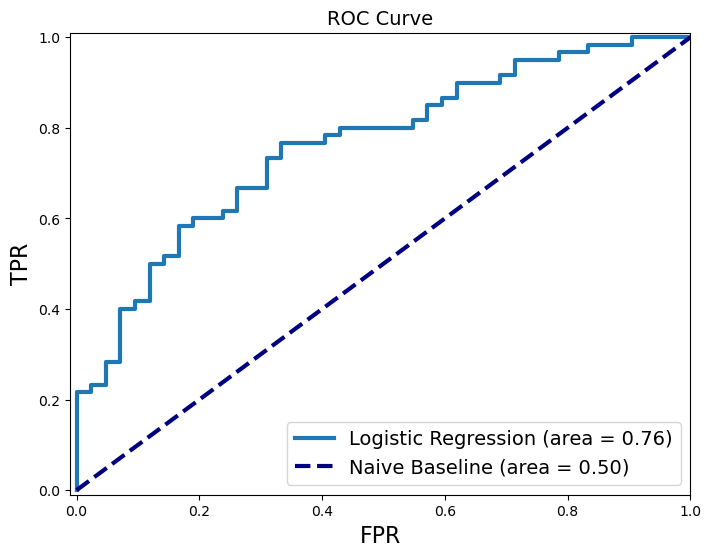

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=14)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()